<a href="https://colab.research.google.com/github/jui24/detect/blob/main/skin_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install tensorflow

In [3]:
!pip install keras


In [4]:
!nvidia-smi

Sat Oct 10 17:26:30 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.23.05    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   61C    P8    10W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [5]:
import tensorflow as tf
print(tf.__version__)


2.3.0


In [6]:

from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [7]:
import os
import matplotlib.pyplot as plt
import numpy as np
from glob import glob

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [9]:

from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img


In [10]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [11]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [12]:
PATH = '/content/drive/My Drive/tensormodel'

In [13]:
os.listdir(PATH)

['test', 'train']

In [14]:
train_dir = os.path.join(PATH,
                         'train')
test_dir = os.path.join(PATH,
                        'test')

In [15]:
train_acne_dir = os.path.join(train_dir,
                                'Acne')
train_eczema_dir = os.path.join(train_dir,
                                   'Eczema')
train_herpes_dir = os.path.join(train_dir,
                               'Herpes')
train_lentigo_dir = os.path.join(train_dir,
                                'Lentigo')
train_melasma_dir = os.path.join(train_dir,
                                   'Melasma')
train_rosacea_dir = os.path.join(train_dir,
                               'Rosacea')


test_acne_dir = os.path.join(train_dir,
                                'Acne')
test_eczema_dir = os.path.join(train_dir,
                                   'Eczema')
test_herpes_dir = os.path.join(train_dir,
                               'Herpes')
test_lentigo_dir = os.path.join(train_dir,
                                'Lentigo')
test_melasma_dir = os.path.join(train_dir,
                                   'Melasma')
test_rosacea_dir = os.path.join(train_dir,
                               'Rosacea')

In [16]:
IMG_HEIGHT = 212
IMG_WIDTH = 212
batch_size = 16

In [17]:
image_gen = ImageDataGenerator(
    rescale=1./255
    )

In [18]:
train_data_gen = image_gen.flow_from_directory(
    #batch_size=batch_size,
    directory=train_dir,
    shuffle=True,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='categorical')

Found 791 images belonging to 6 classes.


In [19]:
test_data_gen = image_gen.flow_from_directory(
    #batch_size=batch_size,
    directory=test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='categorical')

Found 248 images belonging to 6 classes.


In [20]:
sample_training_images, _ = next(train_data_gen)


In [21]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 3, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

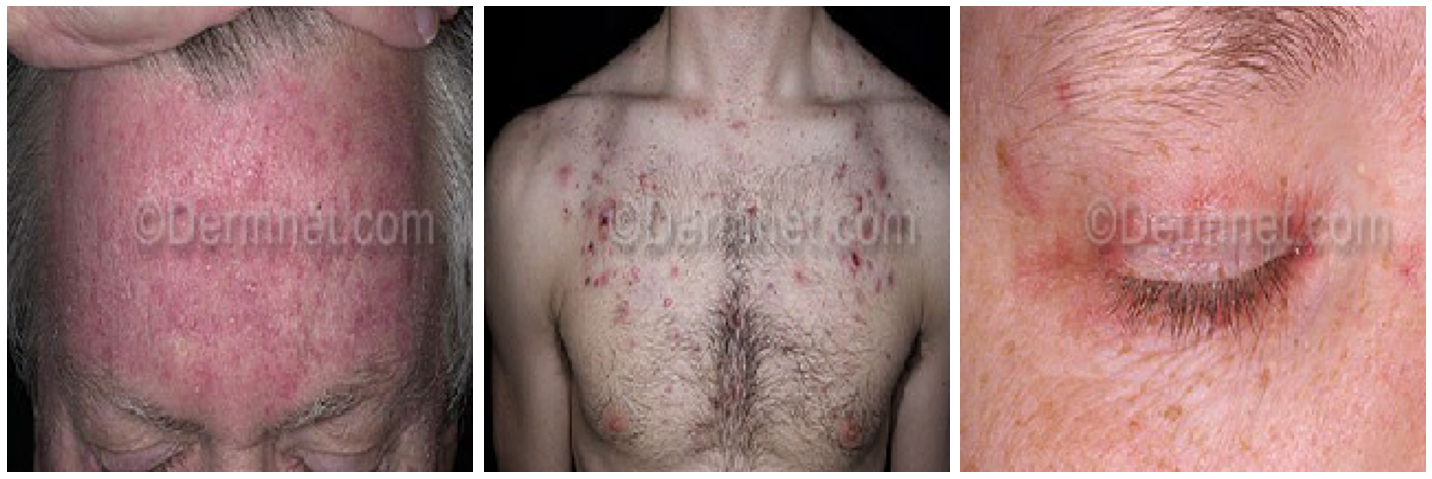

In [22]:
plotImages(sample_training_images[:3])

In [23]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(6, activation='softmax')
])

In [24]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 212, 212, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 106, 106, 16)      0         
_________________________________________________________________
dropout (Dropout)            (None, 106, 106, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 106, 106, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 53, 53, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 64)        0

In [31]:
batch_size = 32
epochs = 15

In [33]:
num_acne_train = len(os.listdir(train_acne_dir))
num_eczema_train = len(os.listdir(train_eczema_dir))
num_herpes_train = len(os.listdir(train_herpes_dir))

num_lentigo_train = len(os.listdir(train_lentigo_dir))
num_melasma_train = len(os.listdir(train_melasma_dir))
num_rosacea_train = len(os.listdir(train_rosacea_dir))

num_acne_test = len(os.listdir(test_acne_dir))
num_eczema_test = len(os.listdir(test_eczema_dir))
num_herpes_test = len(os.listdir(test_herpes_dir))

num_lentigo_test = len(os.listdir(test_lentigo_dir))
num_melasma_test = len(os.listdir(test_melasma_dir))
num_rosacea_test = len(os.listdir(test_rosacea_dir))

total_train = num_acne_train + num_eczema_train + num_herpes_train + num_lentigo_train + num_melasma_train + num_rosacea_train
total_test = num_acne_test + num_eczema_test + num_herpes_test + num_lentigo_test + num_melasma_test + num_rosacea_test


In [34]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=test_data_gen,
    validation_steps=total_test // batch_size,
    callbacks = [tf.keras.callbacks.EarlyStopping(
        monitor='loss',
        min_delta=0.01,
        patience=14
    )]
)

Epoch 1/15
17/17 [==============================] - 2s 127ms/step - loss: 1.4403 - accuracy: 0.4835 - val_loss: 1.5030 - val_accuracy: 0.4718
Epoch 2/15
17/17 [==============================] - 1s 84ms/step - loss: 1.3236 - accuracy: 0.5110
Epoch 3/15
17/17 [==============================] - 1s 84ms/step - loss: 1.2862 - accuracy: 0.5570
Epoch 4/15
17/17 [==============================] - 1s 85ms/step - loss: 1.2289 - accuracy: 0.5717
Epoch 5/15
17/17 [==============================] - 1s 84ms/step - loss: 1.1354 - accuracy: 0.6075
Epoch 6/15
17/17 [==============================] - 1s 84ms/step - loss: 1.1052 - accuracy: 0.6037
Epoch 7/15
17/17 [==============================] - 1s 83ms/step - loss: 1.0351 - accuracy: 0.6374
Epoch 8/15
17/17 [==============================] - 1s 84ms/step - loss: 1.0625 - accuracy: 0.6103
Epoch 9/15
17/17 [==============================] - 1s 85ms/step - loss: 0.9531 - accuracy: 0.6507
Epoch 10/15
17/17 [==============================] - 1s 82ms/step 

In [35]:
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Scatter(x=history.epoch,
                         y=history.history['accuracy'],
                         mode='lines+markers',
                         name='Training accuracy'))
fig.add_trace(go.Scatter(x=history.epoch,
                         y=history.history['val_accuracy'],
                         mode='lines+markers',
                         name='Validation accuracy'))
fig.update_layout(title='Accuracy',
                  xaxis=dict(title='Epoch'),
                  yaxis=dict(title='Percentage'))
fig.show()